In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

In [32]:
# datetime 변경
datetime = pd.to_datetime(train['datetime'])
# 컬럼 추가
train['year'] = datetime.dt.year
train['month'] = datetime.dt.month
train['day'] = datetime.dt.day
train['hour'] = datetime.dt.hour
train['minute'] = datetime.dt.minute
train['second'] = datetime.dt.second

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

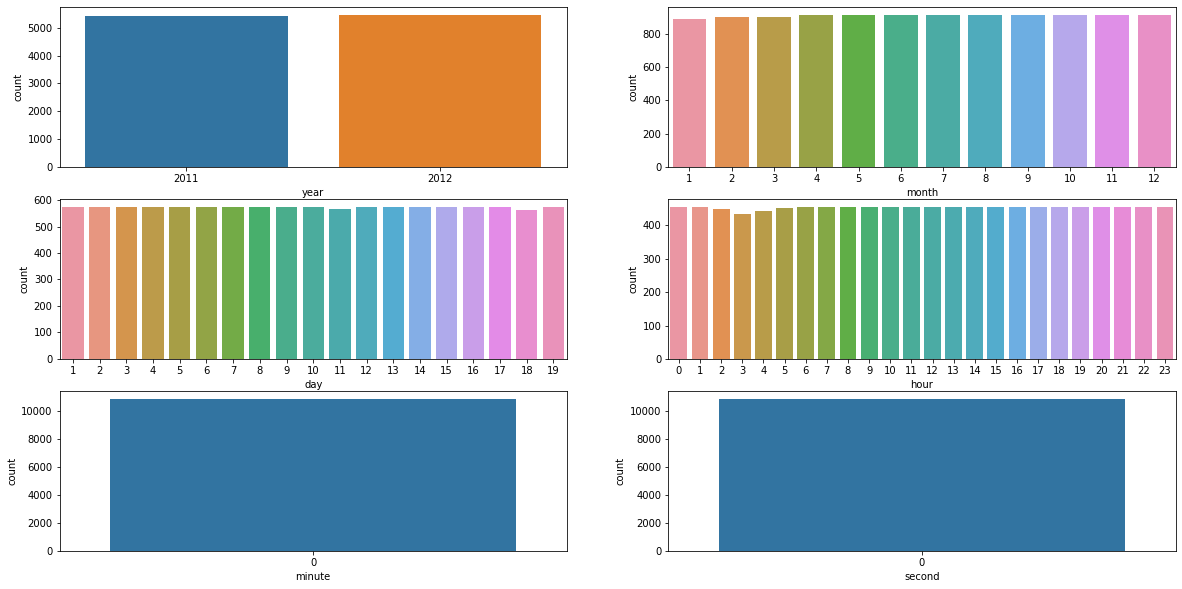

In [40]:
# year, month, day, hour, minute, second 데이터 개수 시각화
fig = plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.countplot(train['year'])
plt.subplot(322)
sns.countplot(train['month'])
plt.subplot(323)
sns.countplot(train['day'])
plt.subplot(324)
sns.countplot(train['hour'])
plt.subplot(325)
sns.countplot(train['minute'])
plt.subplot(326)
sns.countplot(train['second'])
plt.show()

In [47]:
# X, y 컬럼 선택 및 train/test 데이터 분리
feature_name = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','month','day','hour']
X = pd.DataFrame(train, columns=feature_name)
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [49]:
# LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = model.predict(X_test)
print(y_pred)
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

[243.94017116 199.97343472 275.20997312 ... 294.16938949 153.47481909
 234.81161815]
149.79634774282871


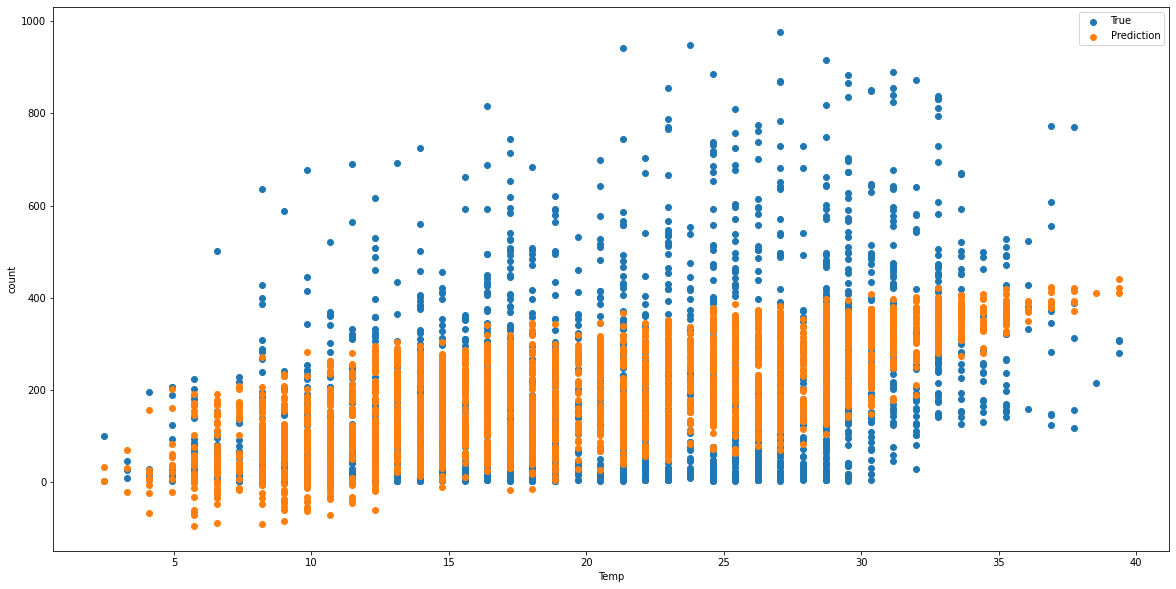

In [58]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화
fig = plt.figure(figsize=(20, 10))
plt.scatter(X_test['temp'], y_test, label="True")
plt.scatter(X_test['temp'], y_pred, label='Prediction')
plt.xlabel("Temp")
plt.ylabel("count")
plt.legend()
plt.show()